# Diabetes Analysis 

## importing libraries and performing basic analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df=pd.read_csv("diabetes_prediction_dataset.csv")
print(df.head())
print(df.describe())
#no outliers in age
print(df.shape)
print(df.isnull().sum())
#no null values


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0

In [2]:
categorical_cols=["gender","smoking_history"]
for col in categorical_cols:
    print(col, ":", df[col].unique())

gender : ['Female' 'Male' 'Other']
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [3]:
#smoking history as no info might cause trouble we have to somehow try to treat that
no_info_rows = df[df['smoking_history'] == 'No Info']
print(no_info_rows)
#here since No Info has to many values we cannot drop it 
print(df.smoking_history.value_counts())

       gender   age  hypertension  heart_disease smoking_history    bmi  \
1      Female  54.0             0              0         No Info  27.32   
7      Female  79.0             0              0         No Info  23.86   
14     Female  76.0             0              0         No Info  27.32   
15       Male  78.0             0              0         No Info  27.32   
18     Female  42.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99994  Female  36.0             0              0         No Info  24.60   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   

       HbA1c_level  blood_glucose_level  diabetes  
1              6.6                   80        

## Using mode to fill No Info column

In [4]:
# Replace 'No Info' in smoking_history with the second most frequent value of the column since first itself is No Info
mode_smoking_history = df['smoking_history'].mode()[0]
second_mode_smoking_history = df['smoking_history'].value_counts().index[1]
df['smoking_history'] = df['smoking_history'].replace('No Info', second_mode_smoking_history)
# Verify the replacement
print(df.smoking_history.value_counts())

smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [5]:
categorical_cols=["gender","smoking_history"]
for col in categorical_cols:
    print(col, ":", df[col].unique())


gender : ['Female' 'Male' 'Other']
smoking_history : ['never' 'current' 'former' 'ever' 'not current']


## one-hot encoding for categorical features 

In [6]:

# One hot encoding for gender column
df = pd.get_dummies(df, columns=['gender'], drop_first=True,dtype=int)
# Verify the encoding
print(df.head())

    age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0  80.0             0              1           never  25.19          6.6   
1  54.0             0              0           never  27.32          6.6   
2  28.0             0              0           never  27.32          5.7   
3  36.0             0              0         current  23.45          5.0   
4  76.0             1              1         current  20.14          4.8   

   blood_glucose_level  diabetes  gender_Male  gender_Other  
0                  140         0            0             0  
1                   80         0            0             0  
2                  158         0            1             0  
3                  155         0            0             0  
4                  155         0            1             0  


## label encoding for smoking_history feature

In [7]:
#since i didn't have any data on what to replace the values with this is best that i could come up with
smoking_mapping = {
    'never': 0,
    'current': 2,
    'former': 1,
    'ever': 1,
    'not current': 1
}


df['smoking_history'] = df['smoking_history'].map(smoking_mapping)

# Verify the mapping
print(df.head())

    age  hypertension  heart_disease  smoking_history    bmi  HbA1c_level  \
0  80.0             0              1                0  25.19          6.6   
1  54.0             0              0                0  27.32          6.6   
2  28.0             0              0                0  27.32          5.7   
3  36.0             0              0                2  23.45          5.0   
4  76.0             1              1                2  20.14          4.8   

   blood_glucose_level  diabetes  gender_Male  gender_Other  
0                  140         0            0             0  
1                   80         0            0             0  
2                  158         0            1             0  
3                  155         0            0             0  
4                  155         0            1             0  


## heatmap to see the correlation between features and affect of features 

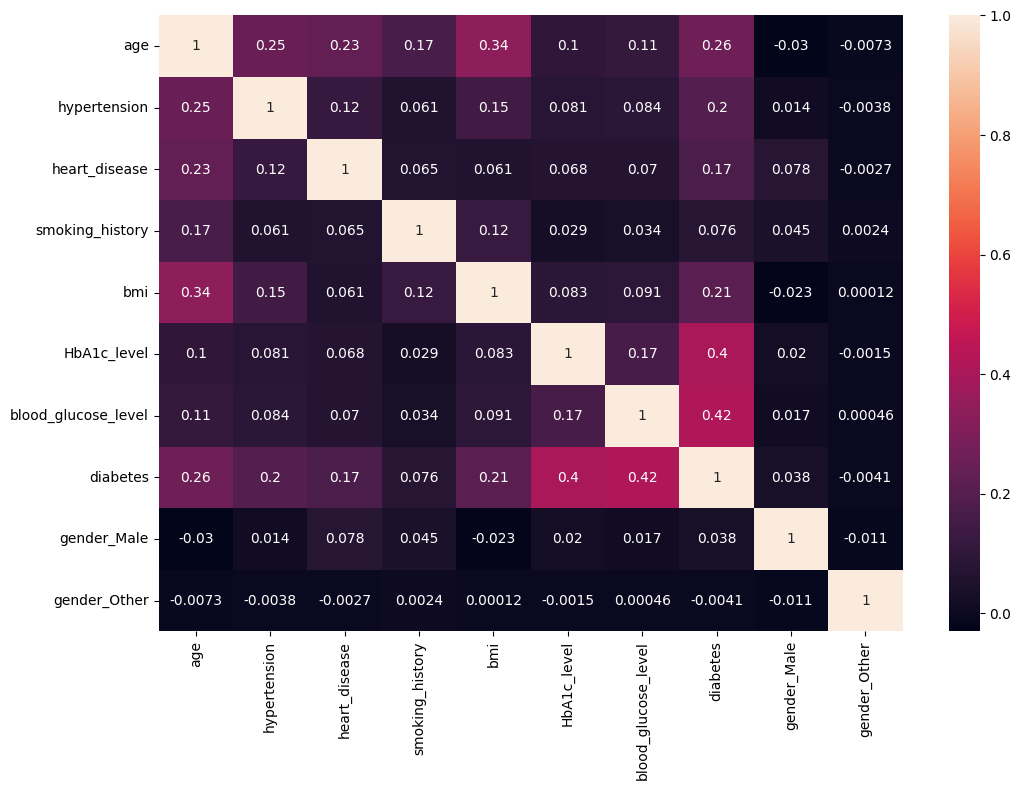

In [8]:
plt.figure(figsize=(12, 8))
cm=df.corr()
sns.heatmap(cm,annot=True)
plt.show()


## histplot for the trend of data and skrewness of data

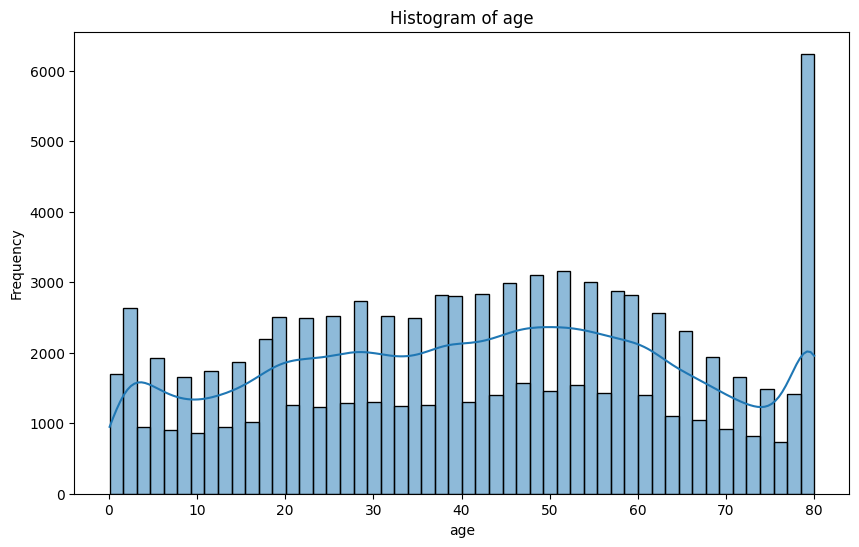

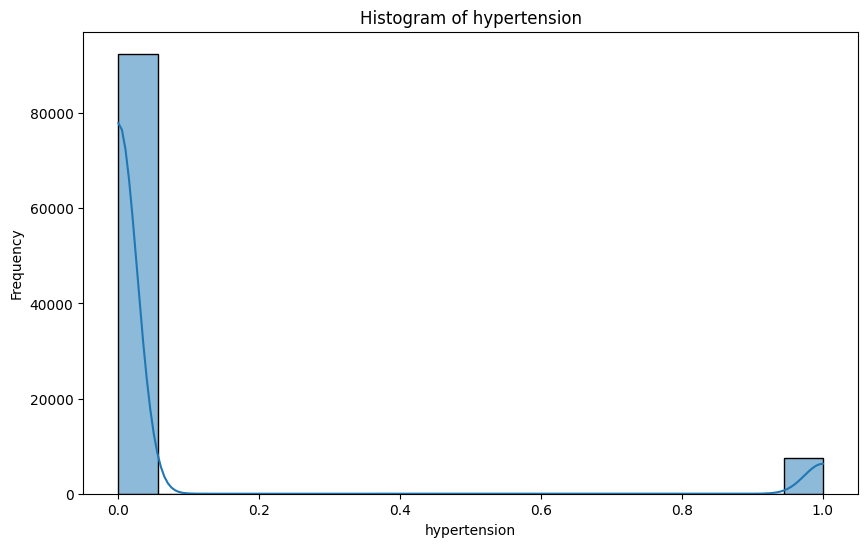

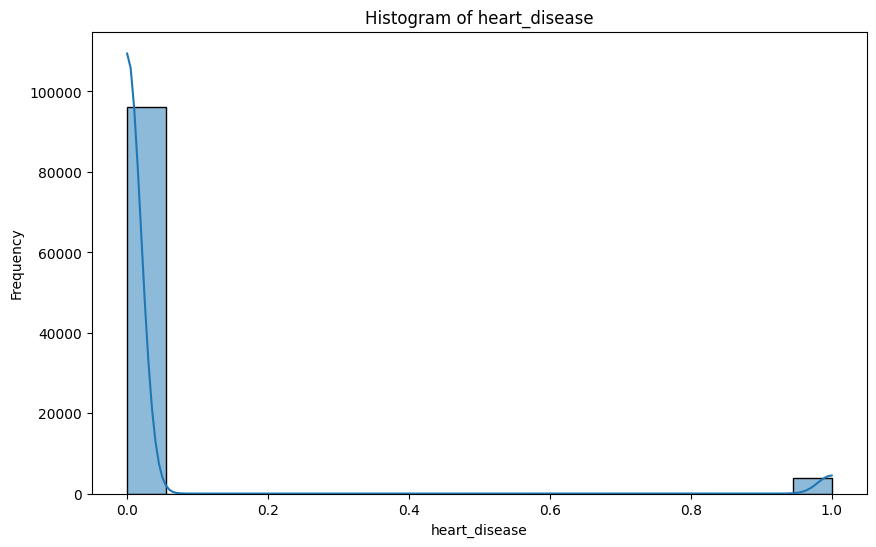

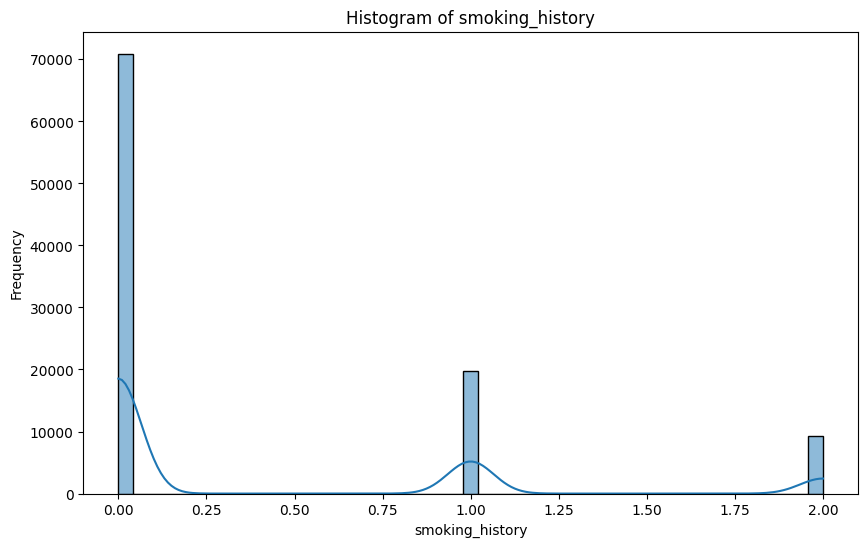

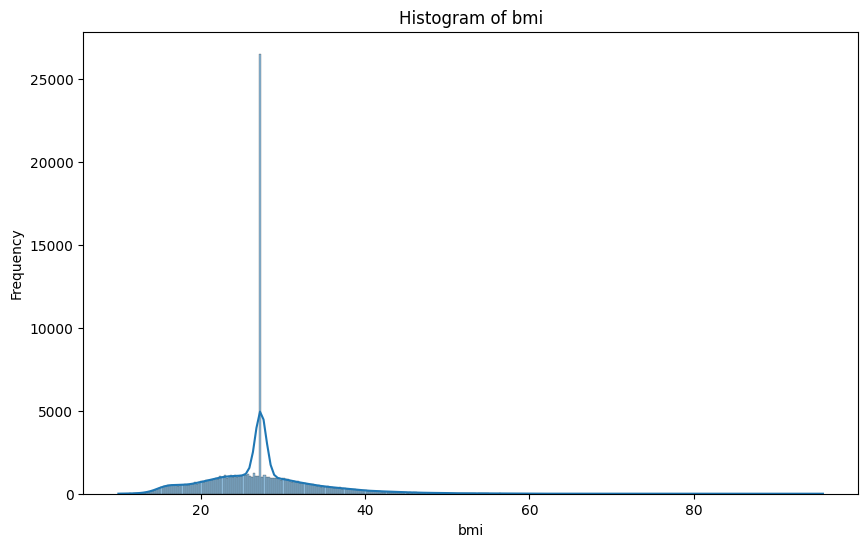

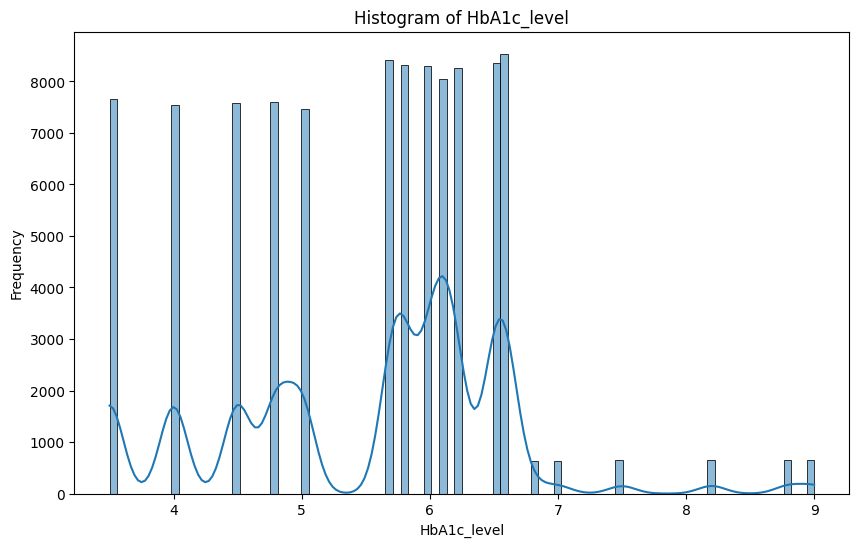

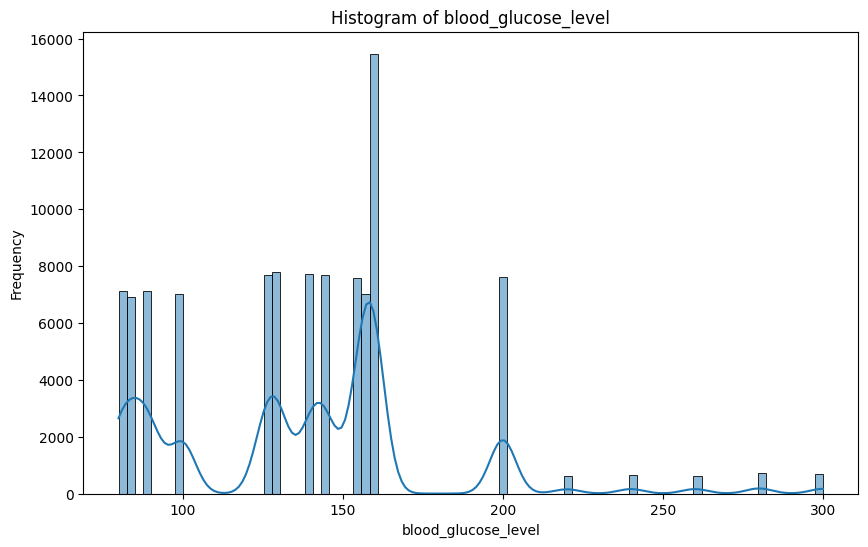

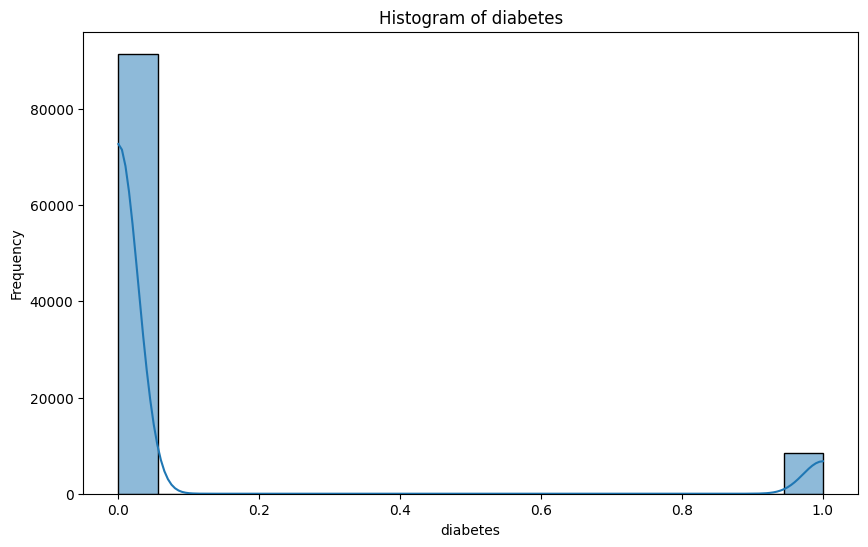

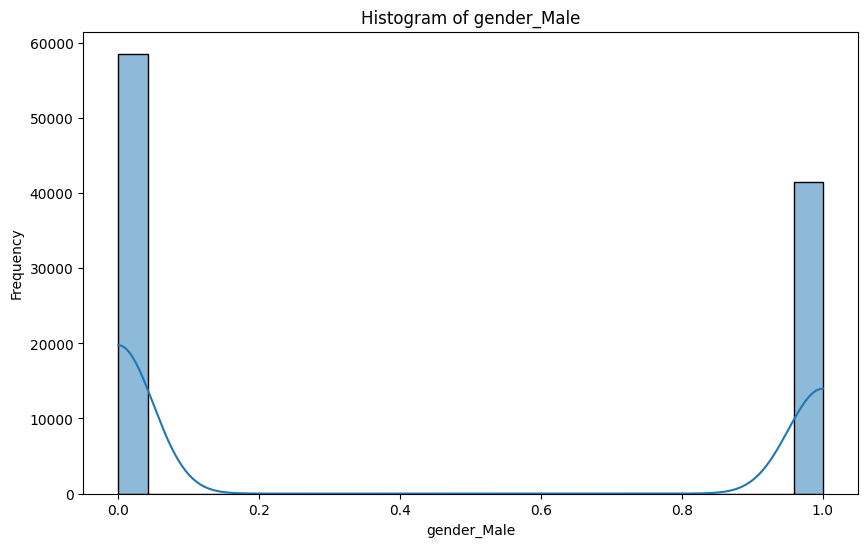

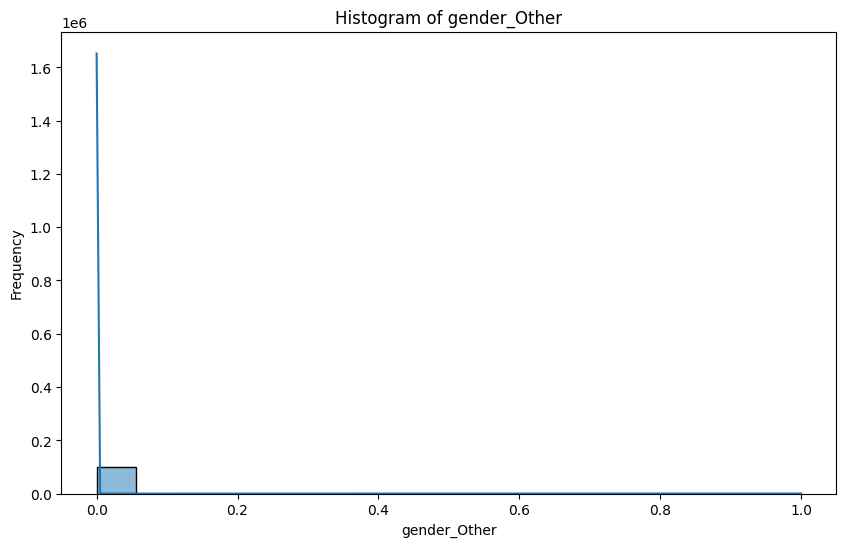

In [9]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## creating x,y for training the model and scaling the data for better performance

In [10]:
x=df.drop("diabetes",axis=1)
y=df["diabetes"]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[x.columns]=scaler.fit_transform(x[x.columns])

print(x.head())

        age  hypertension  heart_disease  smoking_history       bmi  \
0  1.692704     -0.284439       4.936379        -0.590590 -0.321056   
1  0.538006     -0.284439      -0.202578        -0.590590 -0.000116   
2 -0.616691     -0.284439      -0.202578        -0.590590 -0.000116   
3 -0.261399     -0.284439      -0.202578         2.487404 -0.583232   
4  1.515058      3.515687       4.936379         2.487404 -1.081970   

   HbA1c_level  blood_glucose_level  gender_Male  gender_Other  
0     1.001706             0.047704    -0.841046     -0.013418  
1     1.001706            -1.426210    -0.841046     -0.013418  
2     0.161108             0.489878     1.188995     -0.013418  
3    -0.492690             0.416183    -0.841046     -0.013418  
4    -0.679490             0.416183     1.188995     -0.013418  


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

## splitting the data in train-test format for training and evaluating

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (75000, 9)
x test:  (25000, 9)
y train:  (75000,)
y test:  (25000,)


## trying basic logistic model and trying 90 recall model with auc,roc

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22850
           1       0.87      0.61      0.72      2150

    accuracy                           0.96     25000
   macro avg       0.92      0.80      0.85     25000
weighted avg       0.96      0.96      0.96     25000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22850
           1       0.81      0.65      0.72      2150

    accuracy                           0.96     25000
   macro avg       0.89      0.82      0.85     25000
weighted avg       0.95      0.96      0.96     25000

[0. 0. 0. 0. 0.]
[0.         0.00046512 0.13767442 0.13860465 0.32883721]
[       inf 0.9999924  0.99385363 0.99381879 0.93797154]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     22850
           1       0.38      0.90      0.53      2150

    accuracy                           0.87     250

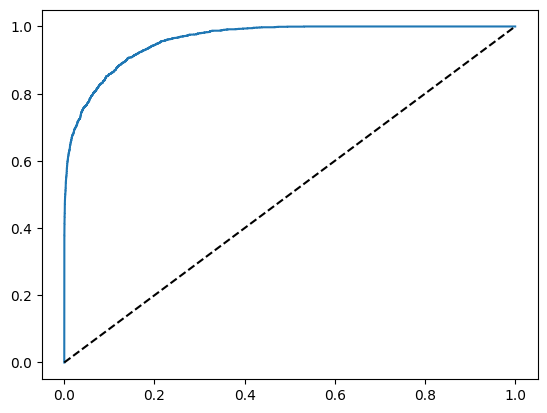

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
probabilities=model.predict_proba(X_test)[:,1]
y_pred=(probabilities>0.4).astype(int)
report = classification_report(y_test, y_pred)
print(report)
from sklearn.metrics import roc_curve, roc_auc_score,auc
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
print(fpr[:5])
print(tpr[:5])
print(thresholds[:5])
desired_recall=0.9
closest_index=np.argmin(np.abs(tpr-desired_recall))
closest_threshold=thresholds[closest_index]
y_pred=(probabilities>closest_threshold).astype(int)
report = classification_report(y_test, y_pred)
print(report)
area_under_curve=auc(fpr, tpr)
print(area_under_curve)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % area_under_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

## trying random forest

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22850
           1       0.93      0.69      0.79      2150

    accuracy                           0.97     25000
   macro avg       0.95      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22850
           1       0.88      0.71      0.78      2150

    accuracy                           0.97     25000
   macro avg       0.92      0.85      0.88     25000
weighted avg       0.96      0.97      0.96     25000

[0. 0. 0. 0. 0.]
[0.         0.48046512 0.48093023 0.60139535 0.63953488]
[  inf 1.    0.995 0.99  0.98 ]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     22850
           1       0.47      0.89      0.62      2150

    accuracy                           0.90     25000
   macro avg       0.7

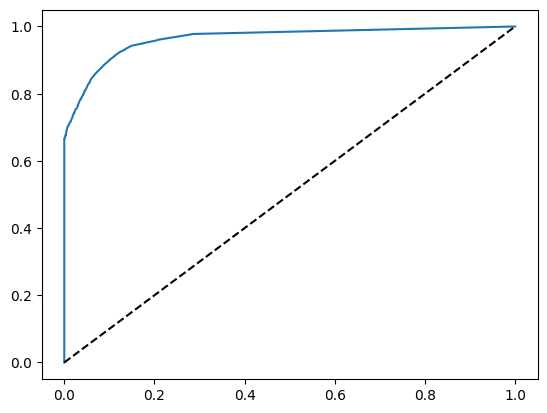

In [14]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
probabilities=model.predict_proba(X_test)[:,1]
y_pred=(probabilities>0.4).astype(int)
report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import roc_curve, roc_auc_score,auc
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
print(fpr[:5])
print(tpr[:5])
print(thresholds[:5])
desired_recall=0.9
closest_index=np.argmin(np.abs(tpr-desired_recall))
closest_threshold=thresholds[closest_index]
y_pred=(probabilities>closest_threshold).astype(int)
report = classification_report(y_test, y_pred)
print(report)
area_under_curve=auc(fpr, tpr)
print(area_under_curve)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % area_under_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()




## Trying xgb model

In [15]:
xgb_model = XGBClassifier(
    random_state=10, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')

print('XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb))

print('XGBoost Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.97076
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22850
           1       0.96      0.69      0.80      2150

    accuracy                           0.97     25000
   macro avg       0.97      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000

XGBoost Confusion Matrix:
[[22787    63]
 [  668  1482]]


## using smote tomek to fix the inbalance distribution in data 

In [16]:
from imblearn.combine import SMOTETomek
smote_tomek=SMOTETomek(random_state=42,) 
X_res,y_res=smote_tomek.fit_resample(X_train,y_train)
print(y_res.value_counts(),y_train.value_counts())

diabetes
0    68079
1    68079
Name: count, dtype: int64 diabetes
0    68650
1     6350
Name: count, dtype: int64


In [17]:
xgb_model.fit(X_res,y_res)
y_pred_xgb=xgb_model.predict(X_test)    
print(xgb_model.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred_xgb))


report = classification_report(y_test, y_pred_xgb)
print(report)
probabilities_xgb=xgb_model.predict_proba(X_test)[:,1]
y_pred=(probabilities_xgb>0.4).astype(int)
report = classification_report(y_test, y_pred)
print(report)

0.96876
[[22699   151]
 [  630  1520]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22850
           1       0.91      0.71      0.80      2150

    accuracy                           0.97     25000
   macro avg       0.94      0.85      0.89     25000
weighted avg       0.97      0.97      0.97     25000

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22850
           1       0.82      0.74      0.78      2150

    accuracy                           0.96     25000
   macro avg       0.90      0.86      0.88     25000
weighted avg       0.96      0.96      0.96     25000



## Trying 85 recall model with xgb

[0. 0. 0. 0. 0.] [0.         0.00046512 0.00139535 0.00325581 0.00372093] [       inf 0.99999964 0.9999994  0.9999993  0.99999917]
0.8497674418604652 0.23106363 0.05155361050328228
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     22850
           1       0.61      0.85      0.71      2150

    accuracy                           0.94     25000
   macro avg       0.80      0.90      0.84     25000
weighted avg       0.95      0.94      0.94     25000

0.9765377945142741


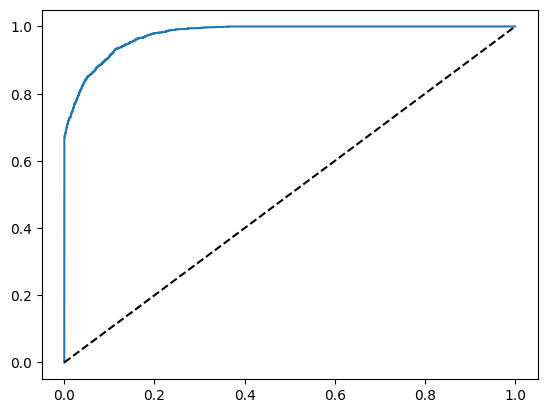

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probabilities_xgb)

print(fpr_xgb[:5], tpr_xgb[:5], thresholds_xgb[:5])


desired_recall=0.85
closest_index=np.argmin(np.abs(tpr_xgb-desired_recall))
print(tpr_xgb[closest_index], thresholds_xgb[closest_index], fpr_xgb[closest_index])

closest_threshold=thresholds_xgb[closest_index]
y_pred=(probabilities_xgb>closest_threshold).astype(int)
report = classification_report(y_test, y_pred)
print(report)
area_under_curve=auc(fpr_xgb, tpr_xgb)
print(area_under_curve)
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.3f)' % area_under_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

## feature importance of xgb model

AUC-PR: 0.6683


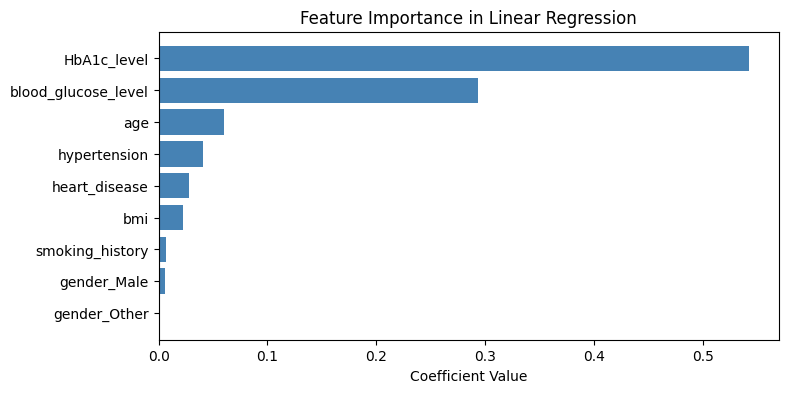

In [19]:
from sklearn.metrics import average_precision_score

auc_pr = average_precision_score(y_test, y_pred_xgb)
print(f"AUC-PR: {auc_pr:.4f}")


feature_importance=xgb_model.feature_importances_




# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

## using optuna for hyperparameter tuning with xgb model 

f:\python\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-29 11:53:21,873] A new study created in memory with name: no-name-eac7ebe4-2366-4910-84d3-6cd5e5f8849b
[I 2025-04-29 11:53:27,338] Trial 0 finished with value: 0.9297281197408539 and parameters: {'lambda': 0.0021144789403120525, 'alpha': 0.6080034925381187, 'subsample': 0.9051879380134253, 'colsample_bytree': 0.834692357478433, 'max_depth': 5, 'eta': 0.13113546684749486, 'gamma': 0.29375655932340705, 'scale_pos_weight': 6.501328067263529, 'min_child_weight': 9, 'max_delta_step': 4}. Best is trial 0 with value: 0.9297281197408539.
[I 2025-04-29 11:53:30,698] Trial 1 finished with value: 0.9547059533866059 and parameters: {'lambda': 9.07969468724965, 'alpha': 4.165127379422303, 'subsample': 0.6416910033775672, 'colsample_bytree': 0.6590710699

Best trial:
  F1-score: 0.9744905809142295
  Params: 
    lambda: 0.009895297949111499
    alpha: 0.13057996752351034
    subsample: 0.7501944212309988
    colsample_bytree: 0.5783464374351749
    max_depth: 9
    eta: 0.27044614080261564
    gamma: 1.3362859622516572
    scale_pos_weight: 1.0485383559268628
    min_child_weight: 4
    max_delta_step: 2
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22850
           1       0.90      0.71      0.80      2150

    accuracy                           0.97     25000
   macro avg       0.94      0.85      0.89     25000
weighted avg       0.97      0.97      0.97     25000

[0. 0. 0. 0. 0.] [0.         0.00046512 0.00418605 0.00604651 0.00744186] [       inf 0.99999475 0.9999856  0.9999846  0.999984  ]
0.8 0.29335743 0.036411378555798686
threshold 0.29335743
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     22850
           1       0

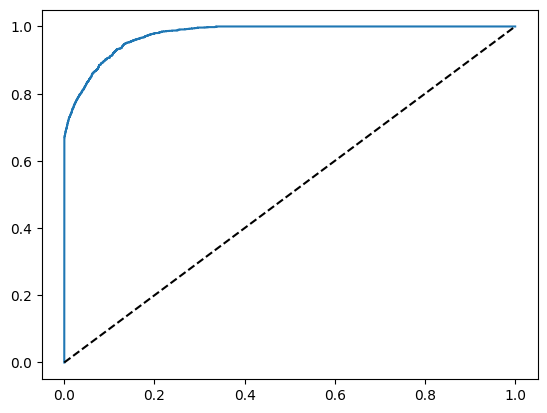

       Default Truth  Default Probability
75721              0             0.018660
80184              0             0.000003
19864              0             0.000554
   Decile  Minimum Probability  Maximum Probability  Events  Non-events
0       0         6.119102e-07             0.000015     0.0      2500.0
1       1         1.544454e-05             0.000037     0.0      2501.0
2       2         3.721360e-05             0.000104     0.0      2499.0
3       3         1.039651e-04             0.000223     0.0      2500.0
4       4         2.228743e-04             0.000480     0.0      2500.0
5       5         4.807573e-04             0.005681     0.0      2500.0
6       6         5.688582e-03             0.024817    28.0      2472.0
7       7         2.482731e-02             0.099662    96.0      2404.0
8       8         9.972131e-02             0.300654   311.0      2189.0
9       9         3.007353e-01             0.999995  1715.0       785.0
   Decile  Minimum Probability  Maximum 

C:\Users\Samar Gharat\AppData\Local\Temp\ipykernel_120112\2987471128.py:86: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


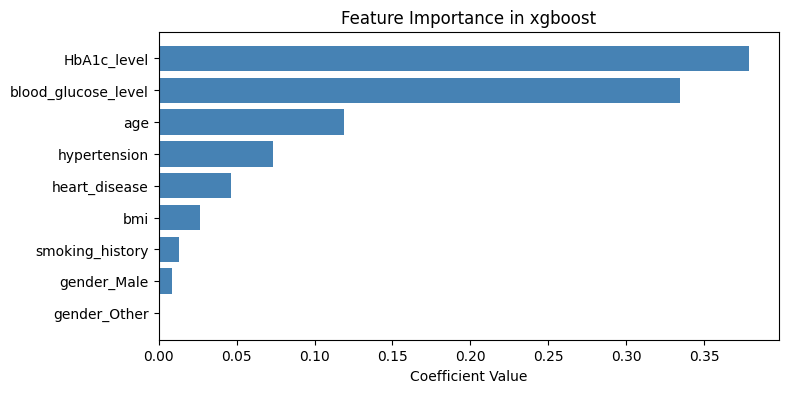

0.8497674418604652 0.22208785 0.05934354485776805
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22850
           1       0.57      0.85      0.68      2150

    accuracy                           0.93     25000
   macro avg       0.78      0.89      0.82     25000
weighted avg       0.95      0.93      0.94     25000



In [20]:

import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_res, y_res, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_res, y_res)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

probabilities_xgb=best_model_xgb.predict_proba(X_test)[:,1]
# y_pred=(probabilities_xgb>0.4).astype(int)
# report = classification_report(y_test, y_pred)
# print(report)

from sklearn.metrics import roc_curve, roc_auc_score,auc

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probabilities_xgb)

print(fpr_xgb[:5], tpr_xgb[:5], thresholds_xgb[:5])

desired_recall=0.80
closest_index=np.argmin(np.abs(tpr_xgb-desired_recall))
print(tpr_xgb[closest_index], thresholds_xgb[closest_index], fpr_xgb[closest_index])

closest_threshold=thresholds_xgb[closest_index]
print("threshold",closest_threshold)
y_pred=(probabilities_xgb>closest_threshold).astype(int)
report = classification_report(y_test, y_pred)
print(report)
area_under_curve=auc(fpr_xgb, tpr_xgb)
print(area_under_curve)
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.3f)' % area_under_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
probabilities = best_model_xgb.predict_proba(X_test)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
print(df_eval.head(3))
# pd.qcut(df_eval["Default Probability"],x,10,labels=,duplicates="drop")
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval[df_eval.Decile==8]['Default Probability'].describe()
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
print(df_decile)
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()

df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
print(df_decile)
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
print(df_decile)
from sklearn.metrics import auc

area = auc(fpr_xgb, tpr_xgb)
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)
final_model = best_model_xgb

feature_importance = final_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in xgboost')
plt.show()

desired_recall=0.85
closest_index=np.argmin(np.abs(tpr_xgb-desired_recall))
print(tpr_xgb[closest_index], thresholds_xgb[closest_index], fpr_xgb[closest_index])

closest_threshold=thresholds_xgb[closest_index]
y_pred=(probabilities_xgb>closest_threshold).astype(int)
report = classification_report(y_test, y_pred)
print(report)

In [23]:
desired_recall=0.85
closest_index=np.argmin(np.abs(tpr_xgb-desired_recall))
print(tpr_xgb[closest_index], thresholds_xgb[closest_index], fpr_xgb[closest_index])

closest_threshold=thresholds_xgb[closest_index]
print(closest_threshold)
y_pred=(probabilities_xgb>closest_threshold).astype(int)
report = classification_report(y_test, y_pred)
print(report)

0.8497674418604652 0.22208785 0.05934354485776805
0.22208785
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22850
           1       0.57      0.85      0.68      2150

    accuracy                           0.93     25000
   macro avg       0.78      0.89      0.82     25000
weighted avg       0.95      0.93      0.94     25000



## using optuna with logistic model

[I 2025-04-29 11:34:33,291] A new study created in memory with name: no-name-cd58a480-0f9a-4f53-b5bf-2e7718c588d3
[I 2025-04-29 11:34:34,524] Trial 0 finished with value: 0.8893858605443675 and parameters: {'C': 0.0012368423239865326, 'solver': 'saga', 'tol': 1.1080292096278481e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8893858605443675.
[I 2025-04-29 11:34:34,953] Trial 1 finished with value: 0.8891214618311079 and parameters: {'C': 55.690981775796075, 'solver': 'lbfgs', 'tol': 0.001409984625093633, 'class_weight': None}. Best is trial 0 with value: 0.8893858605443675.
[I 2025-04-29 11:34:35,299] Trial 2 finished with value: 0.8882401327869093 and parameters: {'C': 0.0013499442803733015, 'solver': 'lbfgs', 'tol': 0.022209251929669806, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8893858605443675.
[I 2025-04-29 11:34:35,801] Trial 3 finished with value: 0.8894739934487875 and parameters: {'C': 0.5403615085274106, 'solver': 'saga', 'tol': 0.03322437341

Best trial:
  Accuracy: 0.8903847001277927
  Params: 
    C: 0.002812096032829594
    solver: liblinear
    tol: 0.0022146607537787363
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     22850
           1       0.42      0.89      0.57      2150

    accuracy                           0.88     25000
   macro avg       0.70      0.89      0.75     25000
weighted avg       0.94      0.88      0.90     25000

[0. 0. 0. 0. 0.] [0.         0.00046512 0.12372093 0.12465116 0.29488372] [       inf 0.99999305 0.99830673 0.99830428 0.99082326]
0.9611859854460334


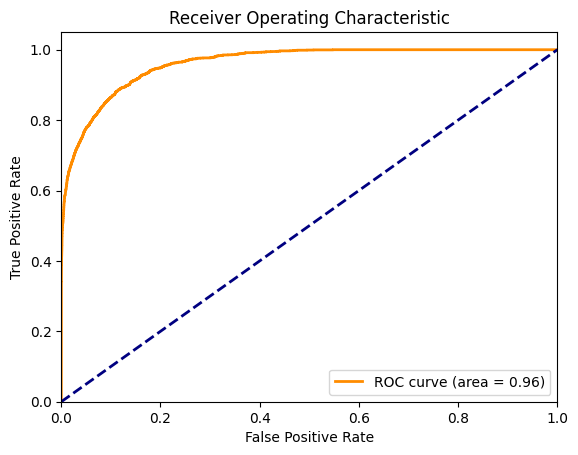

       Default Truth  Default Probability
75721              0             0.012711
80184              0             0.003344
19864              0             0.035171
   Decile  Minimum Probability  Maximum Probability  Events  Non-events
0       0             0.000016             0.002163     0.0      2500.0
1       1             0.002166             0.007726     0.0      2500.0
2       2             0.007727             0.018785     0.0      2500.0
3       3             0.018794             0.040326     0.0      2500.0
4       4             0.040332             0.080762     7.0      2493.0
5       5             0.080763             0.149336    24.0      2476.0
6       6             0.149344             0.267218    45.0      2455.0
7       7             0.267257             0.456785   141.0      2359.0
8       8             0.456795             0.746581   332.0      2168.0
9       9             0.746701             0.999993  1601.0       899.0
   Decile  Minimum Probability  Maximum 

C:\Users\Samar Gharat\AppData\Local\Temp\ipykernel_104276\2341061187.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


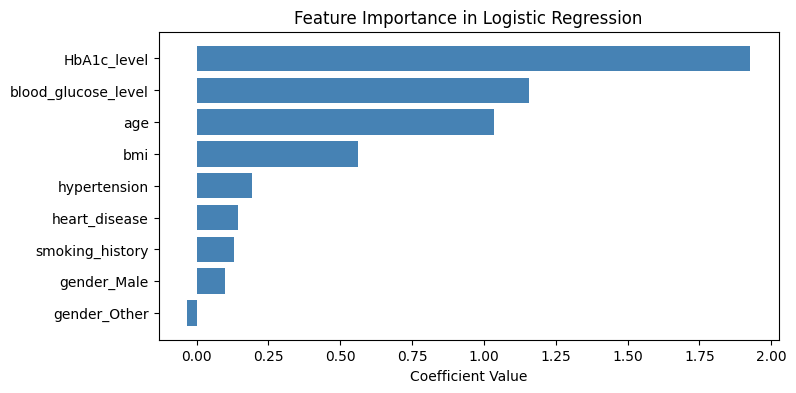

In [21]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, classification_report

def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated accuracy score
    accuracy_scorer = make_scorer(accuracy_score)
    scores = cross_val_score(model, X_res, y_res, cv=3, scoring=accuracy_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

print('Best trial:')
trial = study_logistic.best_trial
print('  Accuracy: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_logistic.best_params
best_model_logistic = LogisticRegression(**best_params, max_iter=10000)
best_model_logistic.fit(X_res, y_res)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

print(fpr[:5], tpr[:5], thresholds[:5])


from sklearn.metrics import auc

area = auc(fpr, tpr)
print(area)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
probabilities = best_model_logistic.predict_proba(X_test)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
print(df_eval.head(3))
# pd.qcut(df_eval["Default Probability"],x,10,labels=False,duplicates="drop")
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval[df_eval.Decile==8]['Default Probability'].describe()
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
print(df_decile)

df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
print(df_decile)
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()

df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
print(df_decile)
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

[0. 0. 0. 0. 0.] [0.         0.00046512 0.12372093 0.12465116 0.29488372] [       inf 0.99999305 0.99830673 0.99830428 0.99082326]
0.9611859854460334


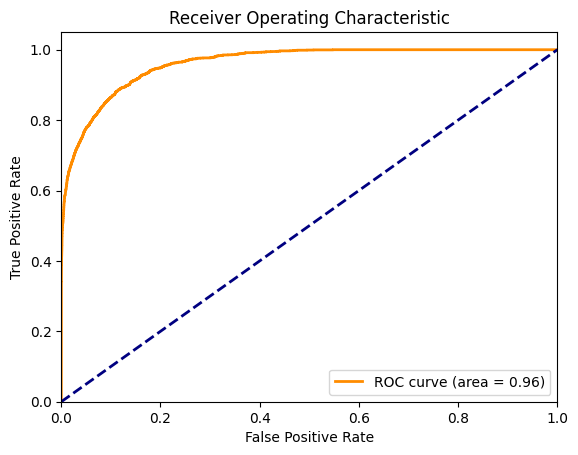

       Default Truth  Default Probability
75721              0             0.012711
80184              0             0.003344
19864              0             0.035171
   Decile  Minimum Probability  Maximum Probability  Events  Non-events
0       0             0.000016             0.002163     0.0      2500.0
1       1             0.002166             0.007726     0.0      2500.0
2       2             0.007727             0.018785     0.0      2500.0
3       3             0.018794             0.040326     0.0      2500.0
4       4             0.040332             0.080762     7.0      2493.0
5       5             0.080763             0.149336    24.0      2476.0
6       6             0.149344             0.267218    45.0      2455.0
7       7             0.267257             0.456785   141.0      2359.0
8       8             0.456795             0.746581   332.0      2168.0
9       9             0.746701             0.999993  1601.0       899.0
   Decile  Minimum Probability  Maximum 

C:\Users\Samar Gharat\AppData\Local\Temp\ipykernel_104276\1204084827.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


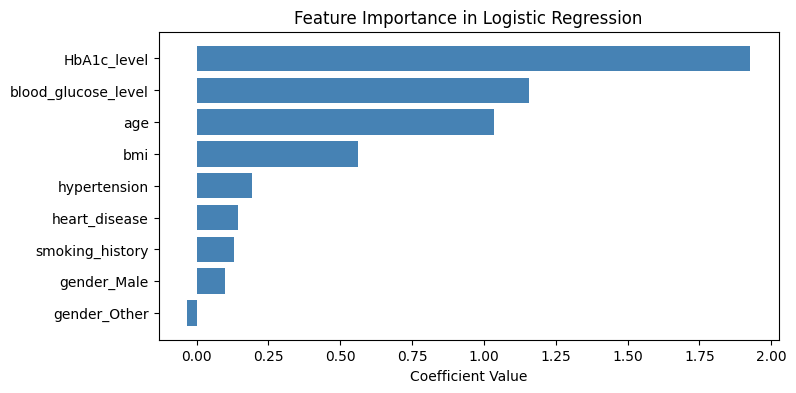

In [22]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

print(fpr[:5], tpr[:5], thresholds[:5])


from sklearn.metrics import auc

area = auc(fpr, tpr)
print(area)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
probabilities = best_model_logistic.predict_proba(X_test)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
print(df_eval.head(3))
# pd.qcut(df_eval["Default Probability"],x,10,labels=False,duplicates="drop")
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval[df_eval.Decile==8]['Default Probability'].describe()
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
print(df_decile)

df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
print(df_decile)
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()

df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
print(df_decile)
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

## Using joblib for dumping models and scaler object with columns to scale


In [23]:
from joblib import dump 
dump(best_model_logistic,"stream_app\\artifacts\\best_model_logistic.joblib")
cols_to_scale=x.columns
print(cols_to_scale)
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': x.columns.tolist()
}
dump(scaler_with_cols, "stream_app\\artifacts\\scaler_col.joblib")

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other'],
      dtype='object')


['stream_app\\artifacts\\scaler_col.joblib']

In [24]:
dump(best_model_logistic,"stream_app\\artifacts\\best_model_xgb.joblib")

['stream_app\\artifacts\\best_model_xgb.joblib']